In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [3]:
# LeNet for MNIST using Keras and TensorFlow

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import LeakyReLU
from keras.utils import np_utils
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten
from keras.layers.core import Permute, Reshape
from keras import backend as K
from keras import optimizers
from keras.models import load_model
np.random.seed(2)


# use GPU mem incrementally
import tensorflow as tf
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.compat.v1.Session(config=config)
# from keras import backend as K
# K.set_session(sess)


Using TensorFlow backend.


In [4]:
# import for c3d
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

In [5]:
from utils import *
from neurallogic import *
from lenet import *
from data_prepare import *
from intergrated_model import *

In [6]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 12345
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# # 5. Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [7]:
# set global parameters
plot_epoch = 500

saved_result_data = 'result_data/marc_sim_win2-2.pkl'

# CE definition

In [8]:
simulation_name = 'marc_sim_win2-2'

############## CE definition ##############

NL_model_name = 'NL_' + simulation_name
PL_model_name = 'PNL_' + simulation_name


num_event_type = 10   # total num of unique events  3x3 + 1 unknown
num_attribute = 1      # total num of attribute (int)

ce_fsm_list = [ [1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9],[10,10],
                [1,2], [3,4],[5,6],[7,8],[9,10]]
ce_time_list = [ np.array([ [INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
               np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                  np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]]),
                np.array([[INF], [0]])
               ]

event_num = 100000
window_size = 2

# Training Neural Logic Models

No existing model found, start training....
Inputs consistency checked. 
Event data generated with size:  (100000, 12)
Total num of event_data: 99999
Data labeling complete!- 99% 	 Remaining time: 0 sec) 
The generated data with size:  
Data_feature:  (99999, 2, 12)
Data_label:  (99999, 15)
(99999, 2, 10)


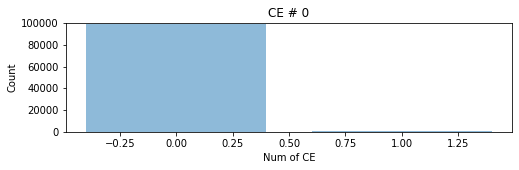

0.010 valid samples in generated data.


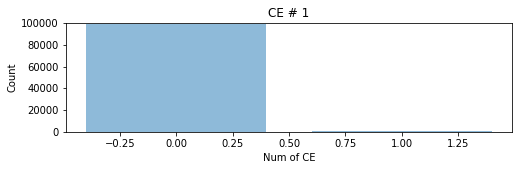

0.010 valid samples in generated data.


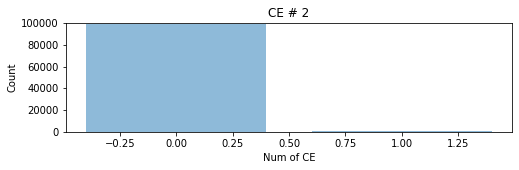

0.010 valid samples in generated data.


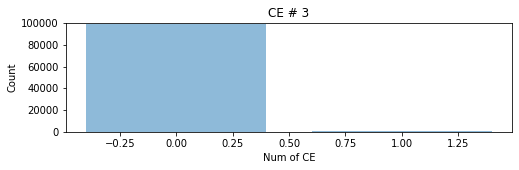

0.010 valid samples in generated data.


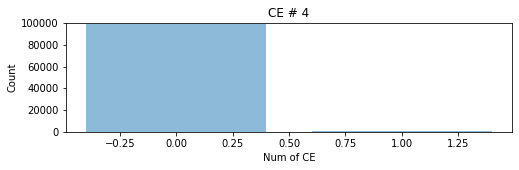

0.010 valid samples in generated data.


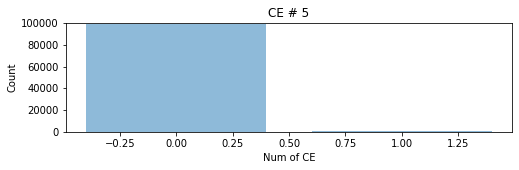

0.010 valid samples in generated data.


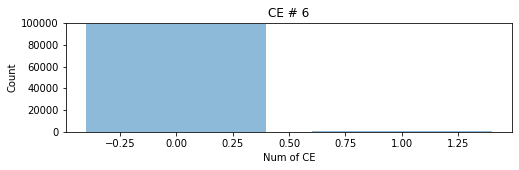

0.010 valid samples in generated data.


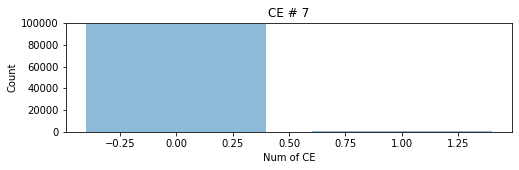

0.010 valid samples in generated data.


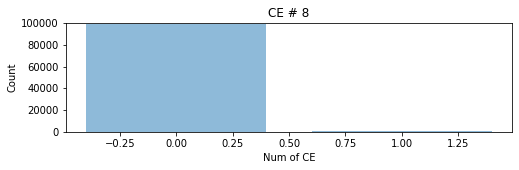

0.010 valid samples in generated data.


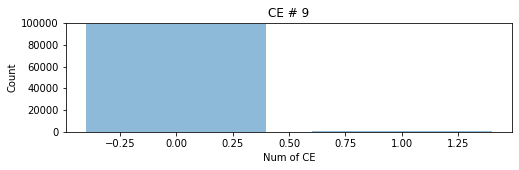

0.009 valid samples in generated data.


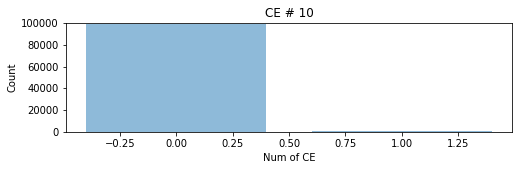

0.010 valid samples in generated data.


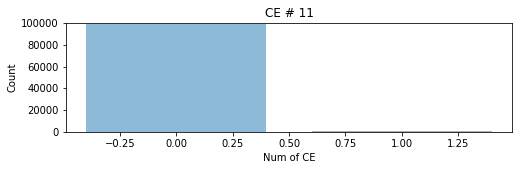

0.010 valid samples in generated data.


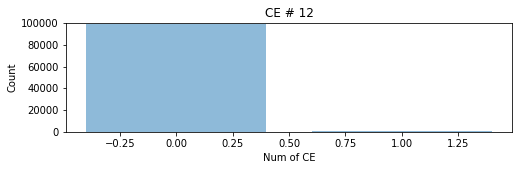

0.011 valid samples in generated data.


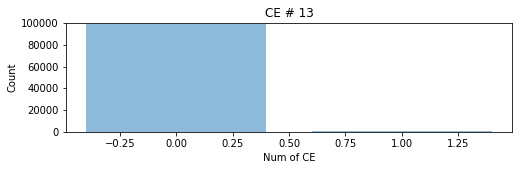

0.010 valid samples in generated data.


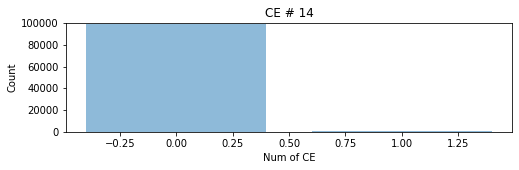

0.010 valid samples in generated data.
(80061, 2, 10) (80061, 15)
(19938, 2, 10) (19938, 15)
Length of time window:  2 
 Dimension of data:  10
building the model ... 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                19200     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                975       
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________
============ Start NL Model Training ===========

The maximum training epochs is:  1000

Epoch 00001: val_MAE improved from inf to 0.02967, saving model to saved_model/NL_marc_sim_win2-2.hdf5

Epoch 00002: val_MAE improved from 0.02967 to 0.00313, saving model to saved_model/NL_marc_sim_win2-2.hdf5

Epoch 00003: val_MAE improved from 0.00313 

In [9]:
train_neurallogic_model(NL_model_name,
                            num_event_type, num_attribute,
                            ce_fsm_list, ce_time_list,
                            window_size,
                            event_num ,
                            verify_logic = False,
                            diagnose = True)

In [10]:
# Returns a compiled model identical to the previous one
loading_path = 'saved_model/'+NL_model_name+'.hdf5'
neuralLogic_model = load_model(loading_path)
neuralLogic_model.name="neurallogic"
print('Loading model successfully from ', loading_path)

Loading model successfully from  saved_model/NL_marc_sim_win2-2.hdf5


# Preparing all dataset required

In [11]:
mnist_event_num = 100000

No existing data found, start generating....
Inputs consistency checked. 
Event data generated with size:  (100000, 12)
Total num of event_data: 99999
Data labeling complete!- 99% 	 Remaining time: 0 sec) 
The generated data with size:  
Data_feature:  (99999, 2, 12)
Data_label:  (99999, 15)
Generating data: 99999 - 100% 	 Remaining time: 0 sec)  
 MNIST events data generated!


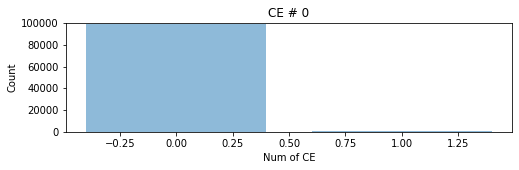

0.010 valid samples in generated data.


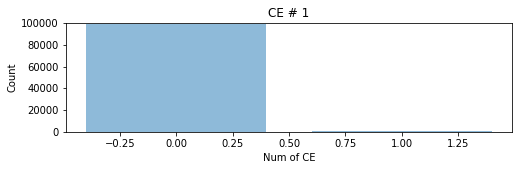

0.010 valid samples in generated data.


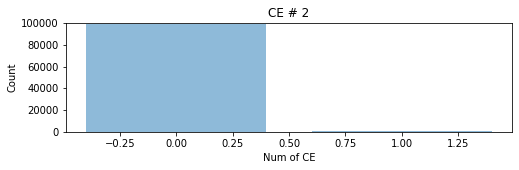

0.010 valid samples in generated data.


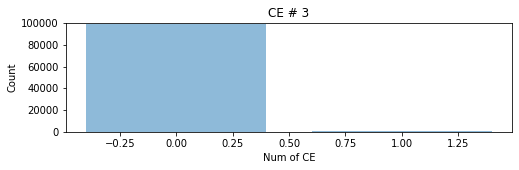

0.010 valid samples in generated data.


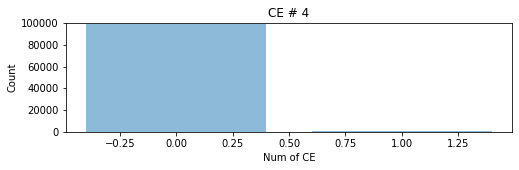

0.010 valid samples in generated data.


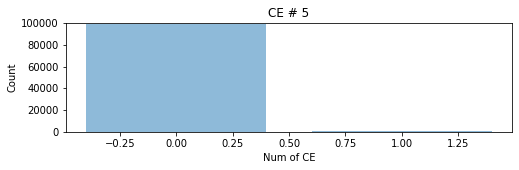

0.010 valid samples in generated data.


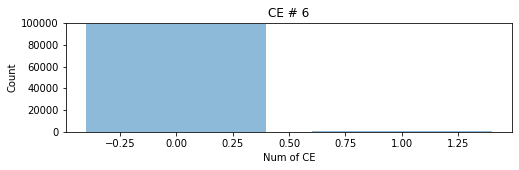

0.010 valid samples in generated data.


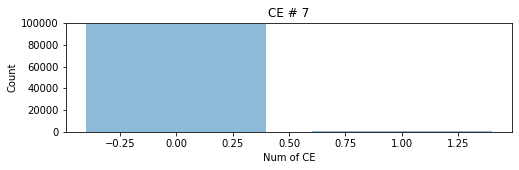

0.011 valid samples in generated data.


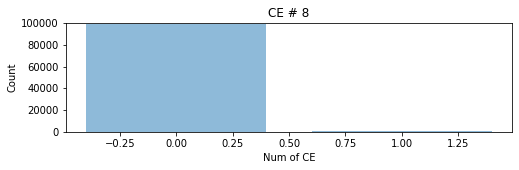

0.010 valid samples in generated data.


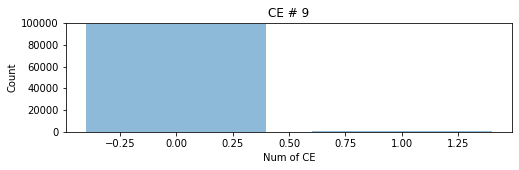

0.010 valid samples in generated data.


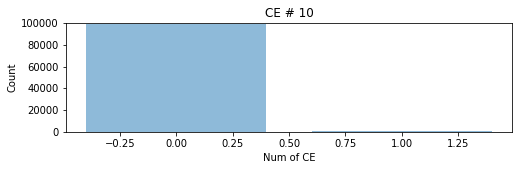

0.010 valid samples in generated data.


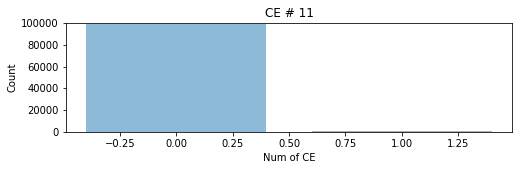

0.010 valid samples in generated data.


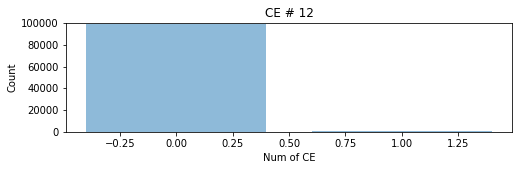

0.010 valid samples in generated data.


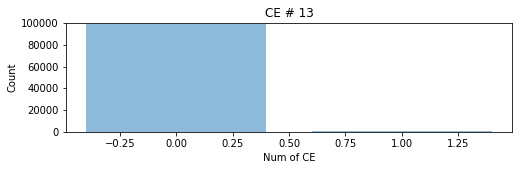

0.010 valid samples in generated data.


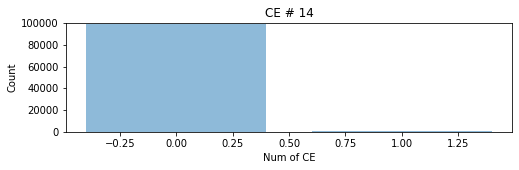

0.010 valid samples in generated data.
(99999, 2, 28, 28, 1)
(99999, 15)
Dim of MNIST event data:  (99999, 2, 28, 28, 1)
Dim of event label data:  (99999, 2, 10)
Dim of MNIST event label:  (99999, 15)
Saved data file to: data/PNL_marc_sim_win2-2_data_100000.npz


In [12]:
mnist_data_event_path = PL_model_name+'_data_' + str(mnist_event_num) +'.npz'
mnist_data_event, data_feature, data_label = generate_mnist_event_data(num_event_type, num_attribute, 
                                                                          ce_fsm_list, ce_time_list,
                                                                          mnist_event_num, window_size,
                                                                          mnist_data_event_path)

In [24]:
if np.ndim(data_label)==1:
    data_label = np.expand_dims(data_label, axis = 1)

# valid_index = (data_label!= 999)# choose valid data samples
valid_index = (data_label.sum(axis = 1)!= 999)
v_mnist_data_event  =  mnist_data_event[valid_index, ]
v_data_label = data_label[valid_index, ]
print('Valid data (with valid CE) shape: ')
print("Data:\t", v_mnist_data_event.shape)
print("Label:\t", v_data_label.shape)

Valid data (with valid CE) shape: 
Data:	 (99999, 2, 28, 28, 1)
Label:	 (99999, 15)


In [25]:
# prepare the testing MNIST dataset for customized LeNet
mnist_label = list(range(num_event_type)) # 
mnist_x_test, mnist_y_test = generate_customized_mnist_data(mnist_label, num_event_type)

Testing mnist feature shape:  (10000, 28, 28, 1)
Testing mnist label shape:  (10000, 10)


In [26]:
v_mnist_data_event = v_mnist_data_event *2 -1
mnist_x_test = mnist_x_test *2 -1

# 1.Training in end2end fashion:
### MSE loss + Adam(0.001)
### Combined loss doesn't work really well, stucked at local minima

In [28]:
# generate a new LeNet model from scratch
lenetModel = LeNet_mnist(num_output = num_event_type)  # 2 events
lenetModel.name="lenetModel"
score = lenetModel.evaluate(mnist_x_test, mnist_y_test, verbose=1)
print('Test loss: %3f,  \t \tTest Accuracy: %4f'%(score[0], score[1]))

final_model = intergrated_model(lenetModel, neuralLogic_model, 
                                window_size, num_event_type,
                                omega_value = 1e-4,
                                load_nl_weights = True,
                                nl_trainable = False,
                                loss = 'combined_loss',  # use semantic loss here
#                                 loss = 'mse_loss',  # use semantic loss here
                                diagnose = False)
# loss = combined_loss / mse_loss

10000/10000 [==============================] - 1s 86us/step
Test loss: 2.308884,  	 	Test Accuracy: 0.131100
Model input:  Tensor("input_3:0", shape=(None, 2, 28, 28, 1), dtype=float32)
Model output:  Tensor("dense_10/BiasAdd:0", shape=(None, 15), dtype=float32)

===== NL model weights loaded =====

===== Neural Logic module freezed.=====

===== Loss Func: Combined Loss =====
 Omega =  0.0001


In [29]:
plot_epoch = 500
epochs = plot_epoch
diagnose = True

save_path = 'saved_model/'+ PL_model_name +'.hdf5'
es = EarlyStopping(monitor='val_MAE', mode='min', verbose=1, patience=plot_epoch)
mc = ModelCheckpoint(save_path, monitor='val_MAE', mode='min', verbose=diagnose, save_best_only=True)
cb_list = [es, mc]

print('The maximum training epochs is: ', epochs)
H = final_model.fit( v_mnist_data_event ,v_data_label, 
#                         batch_size = 32, 
                        batch_size = 256, 
                        epochs = epochs,
                        verbose=diagnose,
                        shuffle=True,
                        callbacks=cb_list,
#                         validation_data = (v_mnist_data_event ,v_data_label) )
                        validation_split = 0.2)

hist_NL = H

The maximum training epochs is:  500
Train on 79999 samples, validate on 20000 samples
Epoch 1/500
79999/79999 [==============================] - 6s 75us/step - loss: 0.0064 - MAE: 0.0202 - val_loss: 9.8768e-04 - val_MAE: 0.0044

Epoch 00001: val_MAE improved from inf to 0.00442, saving model to saved_model/PNL_marc_sim_win2-2.hdf5
Epoch 2/500
79999/79999 [==============================] - 6s 71us/step - loss: 8.0370e-04 - MAE: 0.0029 - val_loss: 7.0584e-04 - val_MAE: 0.0021

Epoch 00002: val_MAE improved from 0.00442 to 0.00205, saving model to saved_model/PNL_marc_sim_win2-2.hdf5
Epoch 3/500
79999/79999 [==============================] - 6s 71us/step - loss: 6.1731e-04 - MAE: 0.0018 - val_loss: 6.5378e-04 - val_MAE: 0.0016

Epoch 00003: val_MAE improved from 0.00205 to 0.00158, saving model to saved_model/PNL_marc_sim_win2-2.hdf5
Epoch 4/500
79999/79999 [==============================] - 6s 71us/step - loss: 5.6914e-04 - MAE: 0.0014 - val_loss: 5.7564e-04 - val_MAE: 0.0012

Epoch 000

79999/79999 [==============================] - 5s 68us/step - loss: 9.9558e-04 - MAE: 8.1557e-04 - val_loss: 0.0012 - val_MAE: 9.8226e-04

Epoch 00077: val_MAE did not improve from 0.00045
Epoch 78/500
79999/79999 [==============================] - 6s 73us/step - loss: 8.9767e-04 - MAE: 7.1407e-04 - val_loss: 0.0010 - val_MAE: 8.4209e-04

Epoch 00078: val_MAE did not improve from 0.00045
Epoch 79/500
79999/79999 [==============================] - 6s 73us/step - loss: 8.1546e-04 - MAE: 6.3222e-04 - val_loss: 9.7496e-04 - val_MAE: 7.8629e-04

Epoch 00079: val_MAE did not improve from 0.00045
Epoch 80/500
79999/79999 [==============================] - 6s 74us/step - loss: 9.2516e-04 - MAE: 7.3811e-04 - val_loss: 0.0013 - val_MAE: 0.0011

Epoch 00080: val_MAE did not improve from 0.00045
Epoch 81/500
79999/79999 [==============================] - 6s 73us/step - loss: 0.0011 - MAE: 9.1597e-04 - val_loss: 9.9054e-04 - val_MAE: 7.9911e-04

Epoch 00081: val_MAE did not improve from 0.00045
Epo


Epoch 00159: val_MAE did not improve from 0.00045
Epoch 160/500
79999/79999 [==============================] - 6s 75us/step - loss: 0.0014 - MAE: 0.0012 - val_loss: 0.0013 - val_MAE: 0.0011

Epoch 00160: val_MAE did not improve from 0.00045
Epoch 161/500
79999/79999 [==============================] - 6s 75us/step - loss: 0.0010 - MAE: 8.0494e-04 - val_loss: 0.0011 - val_MAE: 8.7845e-04

Epoch 00161: val_MAE did not improve from 0.00045
Epoch 162/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0012 - MAE: 0.0010 - val_loss: 0.0015 - val_MAE: 0.0013

Epoch 00162: val_MAE did not improve from 0.00045
Epoch 163/500
79999/79999 [==============================] - 6s 72us/step - loss: 0.0014 - MAE: 0.0012 - val_loss: 0.0013 - val_MAE: 0.0011

Epoch 00163: val_MAE did not improve from 0.00045
Epoch 164/500
79999/79999 [==============================] - 6s 72us/step - loss: 0.0012 - MAE: 9.6827e-04 - val_loss: 0.0029 - val_MAE: 0.0027

Epoch 00164: val_MAE did not imp

79999/79999 [==============================] - 6s 74us/step - loss: 0.0011 - MAE: 9.4075e-04 - val_loss: 0.0013 - val_MAE: 0.0011

Epoch 00202: val_MAE did not improve from 0.00045
Epoch 203/500
79999/79999 [==============================] - 6s 73us/step - loss: 0.0010 - MAE: 8.4352e-04 - val_loss: 9.7319e-04 - val_MAE: 7.7343e-04

Epoch 00203: val_MAE did not improve from 0.00045
Epoch 204/500
79999/79999 [==============================] - 6s 73us/step - loss: 9.3351e-04 - MAE: 7.3596e-04 - val_loss: 0.0014 - val_MAE: 0.0012

Epoch 00204: val_MAE did not improve from 0.00045
Epoch 205/500
79999/79999 [==============================] - 6s 73us/step - loss: 0.0012 - MAE: 0.0010 - val_loss: 0.0013 - val_MAE: 0.0011

Epoch 00205: val_MAE did not improve from 0.00045
Epoch 206/500
79999/79999 [==============================] - 6s 75us/step - loss: 0.0012 - MAE: 0.0010 - val_loss: 0.0015 - val_MAE: 0.0013

Epoch 00206: val_MAE did not improve from 0.00045
Epoch 207/500
79999/79999 [========


Epoch 00244: val_MAE did not improve from 0.00045
Epoch 245/500
79999/79999 [==============================] - 6s 73us/step - loss: 0.0011 - MAE: 9.1693e-04 - val_loss: 0.0023 - val_MAE: 0.0021

Epoch 00245: val_MAE did not improve from 0.00045
Epoch 246/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0014 - MAE: 0.0012 - val_loss: 0.0015 - val_MAE: 0.0013

Epoch 00246: val_MAE did not improve from 0.00045
Epoch 247/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0016 - MAE: 0.0014 - val_loss: 0.0019 - val_MAE: 0.0017

Epoch 00247: val_MAE did not improve from 0.00045
Epoch 248/500
79999/79999 [==============================] - 6s 73us/step - loss: 0.0015 - MAE: 0.0013 - val_loss: 0.0016 - val_MAE: 0.0014

Epoch 00248: val_MAE did not improve from 0.00045
Epoch 249/500
79999/79999 [==============================] - 6s 73us/step - loss: 0.0015 - MAE: 0.0013 - val_loss: 0.0014 - val_MAE: 0.0012

Epoch 00249: val_MAE did not improve fro

79999/79999 [==============================] - 6s 71us/step - loss: 0.0016 - MAE: 0.0014 - val_loss: 0.0019 - val_MAE: 0.0017

Epoch 00330: val_MAE did not improve from 0.00045
Epoch 331/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0015 - MAE: 0.0013 - val_loss: 0.0015 - val_MAE: 0.0013

Epoch 00331: val_MAE did not improve from 0.00045
Epoch 332/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0013 - MAE: 0.0011 - val_loss: 0.0019 - val_MAE: 0.0017

Epoch 00332: val_MAE did not improve from 0.00045
Epoch 333/500
79999/79999 [==============================] - 6s 70us/step - loss: 0.0021 - MAE: 0.0019 - val_loss: 0.0016 - val_MAE: 0.0014

Epoch 00333: val_MAE did not improve from 0.00045
Epoch 334/500
79999/79999 [==============================] - 5s 68us/step - loss: 0.0018 - MAE: 0.0016 - val_loss: 0.0026 - val_MAE: 0.0024

Epoch 00334: val_MAE did not improve from 0.00045
Epoch 335/500
79999/79999 [==============================] 

79999/79999 [==============================] - 6s 74us/step - loss: 0.0023 - MAE: 0.0021 - val_loss: 0.0023 - val_MAE: 0.0021

Epoch 00373: val_MAE did not improve from 0.00045
Epoch 374/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0022 - MAE: 0.0020 - val_loss: 0.0019 - val_MAE: 0.0017

Epoch 00374: val_MAE did not improve from 0.00045
Epoch 375/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0017 - MAE: 0.0015 - val_loss: 0.0016 - val_MAE: 0.0014

Epoch 00375: val_MAE did not improve from 0.00045
Epoch 376/500
79999/79999 [==============================] - 6s 75us/step - loss: 0.0021 - MAE: 0.0019 - val_loss: 0.0015 - val_MAE: 0.0013

Epoch 00376: val_MAE did not improve from 0.00045
Epoch 377/500
79999/79999 [==============================] - 6s 76us/step - loss: 0.0015 - MAE: 0.0013 - val_loss: 0.0017 - val_MAE: 0.0015

Epoch 00377: val_MAE did not improve from 0.00045
Epoch 378/500
79999/79999 [==============================] 

79999/79999 [==============================] - 5s 67us/step - loss: 0.0015 - MAE: 0.0013 - val_loss: 0.0016 - val_MAE: 0.0014

Epoch 00416: val_MAE did not improve from 0.00045
Epoch 417/500
79999/79999 [==============================] - 6s 70us/step - loss: 0.0015 - MAE: 0.0013 - val_loss: 0.0016 - val_MAE: 0.0014

Epoch 00417: val_MAE did not improve from 0.00045
Epoch 418/500
79999/79999 [==============================] - 6s 74us/step - loss: 0.0016 - MAE: 0.0014 - val_loss: 0.0019 - val_MAE: 0.0017

Epoch 00418: val_MAE did not improve from 0.00045
Epoch 419/500
79999/79999 [==============================] - 6s 73us/step - loss: 0.0019 - MAE: 0.0017 - val_loss: 0.0019 - val_MAE: 0.0017

Epoch 00419: val_MAE did not improve from 0.00045
Epoch 420/500
79999/79999 [==============================] - 6s 75us/step - loss: 0.0018 - MAE: 0.0016 - val_loss: 0.0019 - val_MAE: 0.0017

Epoch 00420: val_MAE did not improve from 0.00045
Epoch 421/500
79999/79999 [==============================] 

79999/79999 [==============================] - 6s 75us/step - loss: 0.0027 - MAE: 0.0025 - val_loss: 0.0027 - val_MAE: 0.0025

Epoch 00459: val_MAE did not improve from 0.00045
Epoch 460/500
79999/79999 [==============================] - 6s 72us/step - loss: 0.0022 - MAE: 0.0020 - val_loss: 0.0021 - val_MAE: 0.0019

Epoch 00460: val_MAE did not improve from 0.00045
Epoch 461/500
79999/79999 [==============================] - 5s 67us/step - loss: 0.0021 - MAE: 0.0019 - val_loss: 0.0021 - val_MAE: 0.0019

Epoch 00461: val_MAE did not improve from 0.00045
Epoch 462/500
79999/79999 [==============================] - 5s 67us/step - loss: 0.0019 - MAE: 0.0017 - val_loss: 0.0018 - val_MAE: 0.0016

Epoch 00462: val_MAE did not improve from 0.00045
Epoch 463/500
79999/79999 [==============================] - 5s 67us/step - loss: 0.0018 - MAE: 0.0016 - val_loss: 0.0018 - val_MAE: 0.0016

Epoch 00463: val_MAE did not improve from 0.00045
Epoch 464/500
79999/79999 [==============================] 

In [32]:
final_model.evaluate( v_mnist_data_event ,v_data_label )

99999/99999 [==============================] - 15s 148us/step


[0.001572567797003451, 0.001373025239445269]

# moniter the lenet performance 

In [30]:
lenet_score1 = lenetModel.evaluate(mnist_x_test, mnist_y_test, verbose=0)
# print('Test loss: %3f,  \t \tTest Accuracy: %4f'%(lenet_score1[0], lenet_score1[1]))
print('Proposed acc:\t %4f'%(lenet_score1[1]))
# lenet_score2 = lenetModel_2.evaluate(mnist_x_test, mnist_y_test, verbose=0)
# print('Ablation acc:\t %4f'%(lenet_score2[1]))

Proposed acc:	 0.960300


dict_keys(['val_loss', 'val_MAE', 'loss', 'MAE'])


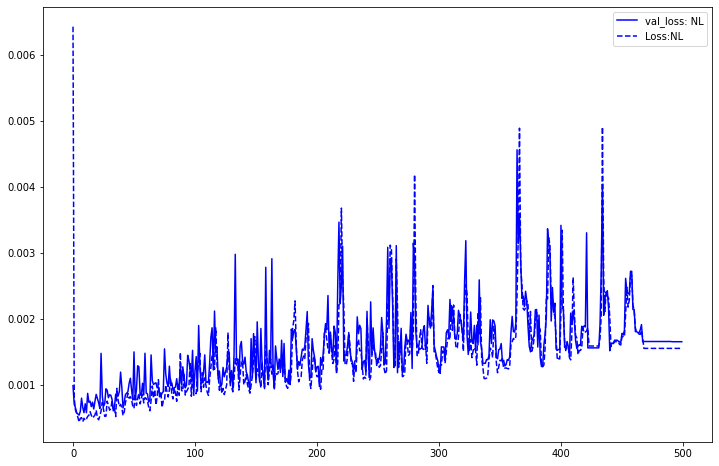

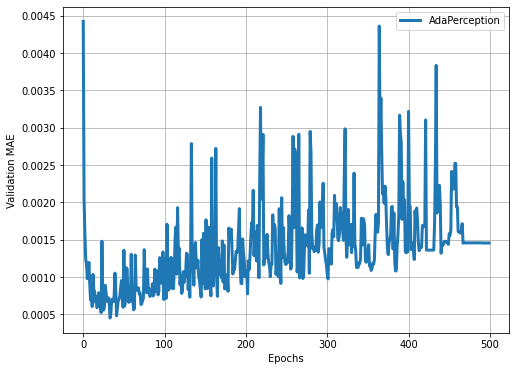

In [31]:
# evaluation: plot the learning curves
hist_NL = H
hist1 = hist_NL.history
print(hist1.keys() )

import matplotlib.pyplot as plt
# # loss figure
fig = plt.figure(figsize=(12,8))
plt.plot(hist1['val_loss'], 'b-')
plt.plot(hist1['loss'], 'b--')
plt.legend(['val_loss: NL', 'Loss:NL', 'val_loss', 'Loss'])
plt.show()

# MAE figure
fig = plt.figure(figsize=(8, 6))
plt.plot(hist1['val_MAE'], '-', linewidth=3)
# plt.plot(hist2['val_MAE'], '-', linewidth=3)
# plt.plot(hist3['val_MAE'], '-', linewidth=3)
# plt.plot(hist4['val_mae'], '-', linewidth=3)

# plt.plot(hist1['MAE'], '-')
# plt.plot(hist2['MAE'], '-')
# plt.plot(hist3['MAE'], '-')
# plt.plot(hist4['mae'], '-')

plt.legend(['AdaPerception', 'AdaPerception w/o L_semantic', 'Training from scratch', 'C3D model'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.savefig('filename.png', dpi=600)
plt.show()
